# 1. LOAD THE DATASET

In [14]:
#packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('EDA_Distribution_Dataset.csv')
df.head()

,Age,Salary,Gender,Department,Experience_Years,Satisfaction_Score,City,Purchase_Amount,Tenure,Attrition
0,56,11406.03,Male,Sales,36,8.68,Delhi,11427.73,1,Yes
1,46,44216.93,Female,IT,38,5.38,Bangalore,20784.22,4,No
2,32,69956.58,Female,Finance,31,5.40,Bangalore,10072.02,8,Yes
3,25,79989.76,Female,HR,16,6.25,Delhi,19122.15,9,No
4,38,60771.48,Male,HR,34,5.87,Delhi,23289.68,3,Yes


In [15]:
df.dtypes

,0
Age,int64
Salary,float64
Gender,object
Department,object
Experience_Years,int64
Satisfaction_Score,float64
City,object
Purchase_Amount,float64
Tenure,int64
Attrition,object


In [16]:
df.nunique()

,0
Age,42
Salary,950
Gender,2
Department,5
Experience_Years,40
Satisfaction_Score,542
City,5
Purchase_Amount,950
Tenure,9
Attrition,2


2. CHECK FOR NULL VALUES

In [17]:
df.isnull()

,Age,Salary,Gender,Department,Experience_Years,Satisfaction_Score,City,Purchase_Amount,Tenure,Attrition
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,True,False,True,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

,0
Age,0
Salary,50
Gender,0
Department,0
Experience_Years,0
Satisfaction_Score,50
City,0
Purchase_Amount,50
Tenure,0
Attrition,0


In [19]:
df.columns

Index(['Age', 'Salary', 'Gender', 'Department', 'Experience_Years',
       'Satisfaction_Score', 'City', 'Purchase_Amount', 'Tenure', 'Attrition'],
      dtype='object')

In [20]:
df["Satisfaction_Score"].fillna("BBBCC")

,Satisfaction_Score
0,8.68
1,5.38
2,5.4
3,6.25
4,5.87
...,...
995,BBBCC
996,6.45
997,7.49
998,7.16


In [21]:
df["Satisfaction_Score"].mean()

np.float64(6.9117578947368425)

In [22]:
df.dropna()

,Age,Salary,Gender,Department,Experience_Years,Satisfaction_Score,City,Purchase_Amount,Tenure,Attrition
0,56,11406.03,Male,Sales,36,8.68,Delhi,11427.73,1,Yes
1,46,44216.93,Female,IT,38,5.38,Bangalore,20784.22,4,No
2,32,69956.58,Female,Finance,31,5.40,Bangalore,10072.02,8,Yes
3,25,79989.76,Female,HR,16,6.25,Delhi,19122.15,9,No
4,38,60771.48,Male,HR,34,5.87,Delhi,23289.68,3,Yes
...,...,...,...,...,...,...,...,...,...,...
994,53,40889.82,Male,Marketing,32,6.29,Mumbai,14610.64,6,No
996,32,53958.42,Male,Finance,19,6.45,Bangalore,13710.72,5,Yes
997,46,41142.83,Female,Sales,17,7.49,Bangalore,14620.01,4,No
998,25,55616.54,Male,IT,37,7.16,Kolkata,20275.14,2,Yes


3.Remove outliers(IQR method)

Salary:

In [23]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bounds= Q1 -1.5*IQR
upper_bounds= Q3 +1.5*IQR
lower_bounds, upper_bounds

(np.float64(8419.756250000006), np.float64(93016.12625))

In [24]:
df=df[(df['Salary']>=lower_bounds)&(df['Salary']<=upper_bounds)]

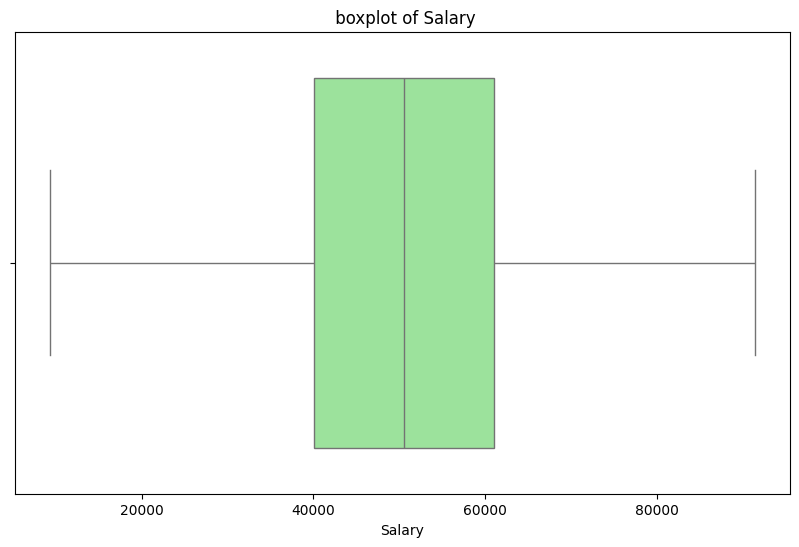

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Salary',data=df, color='lightgreen')
plt.title(' boxplot of Salary')
plt.xlabel('Salary')
plt.show()

Purchase Amount:

In [26]:
Q1 = df['Purchase_Amount'].quantile(0.25)
Q3 = df['Purchase_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bounds= Q1 -1.5*IQR
upper_bounds= Q3 +1.5*IQR
lower_bounds, upper_bounds

(np.float64(5902.389999999999), np.float64(34549.89))

In [27]:
df=df[(df['Purchase_Amount']>=lower_bounds)&(df['Purchase_Amount']<=upper_bounds)]

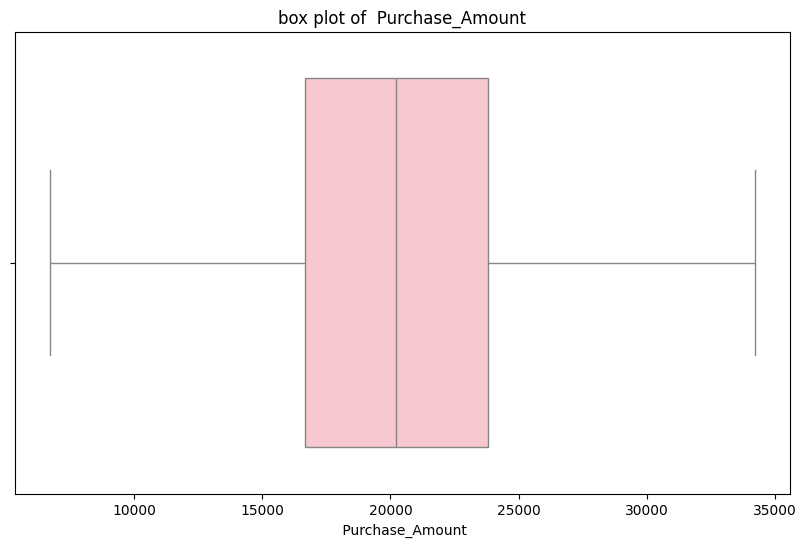

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Purchase_Amount',data=df, color='pink')
plt.title('box plot of  Purchase_Amount')
plt.xlabel(' Purchase_Amount')
plt.show()

 Satisfaction score :

In [29]:
Q1 = df['Satisfaction_Score'].quantile(0.25)
Q3 = df['Satisfaction_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bounds= Q1 -1.5*IQR
upper_bounds= Q3 +1.5*IQR
lower_bounds, upper_bounds

(np.float64(1.160000000000002), np.float64(12.679999999999998))

In [30]:
df=df[(df['Satisfaction_Score']>=lower_bounds)&(df['Satisfaction_Score']<=upper_bounds)]

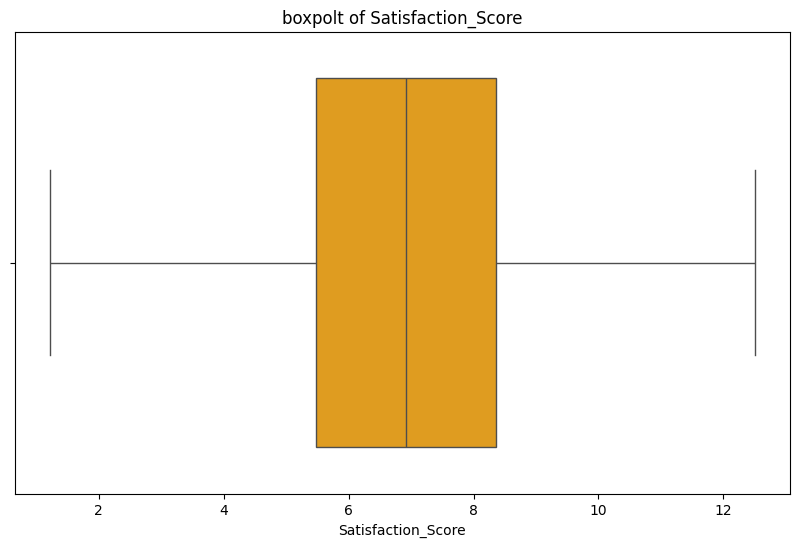

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Satisfaction_Score',data=df, color='orange')
plt.title('boxpolt of Satisfaction_Score')
plt.xlabel('Satisfaction_Score')
plt.show()

## 4.PLOT DISTRIBUTIONS


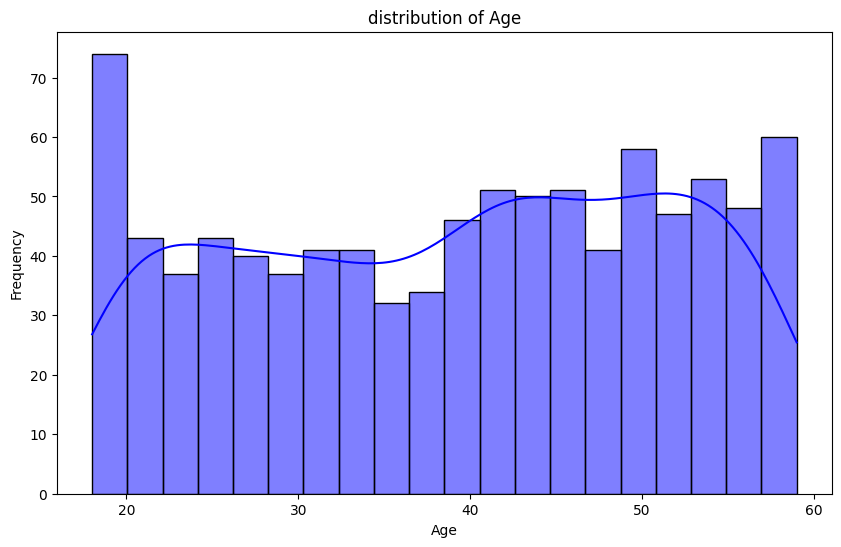

In [32]:
#Distribution app ratings:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=True, bins=20, color='blue')
plt.title('distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

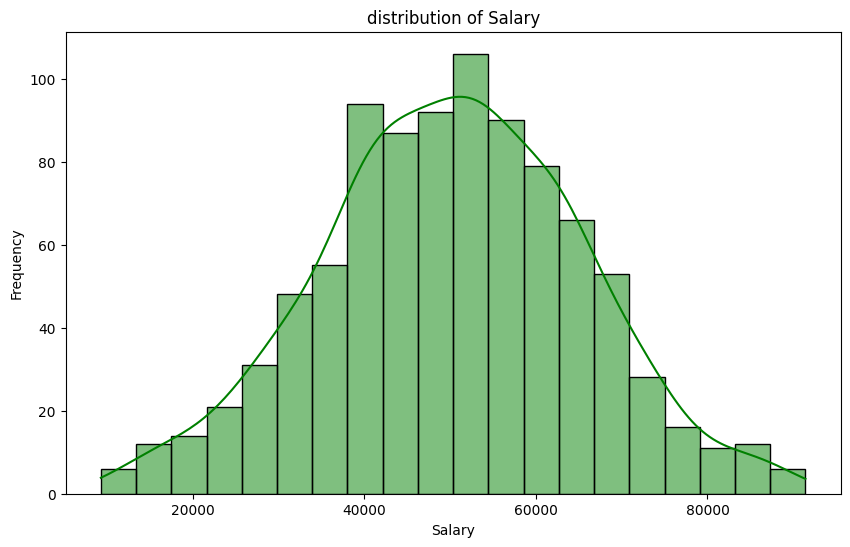

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'].dropna(), kde=True, bins=20, color='green')
plt.title('distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

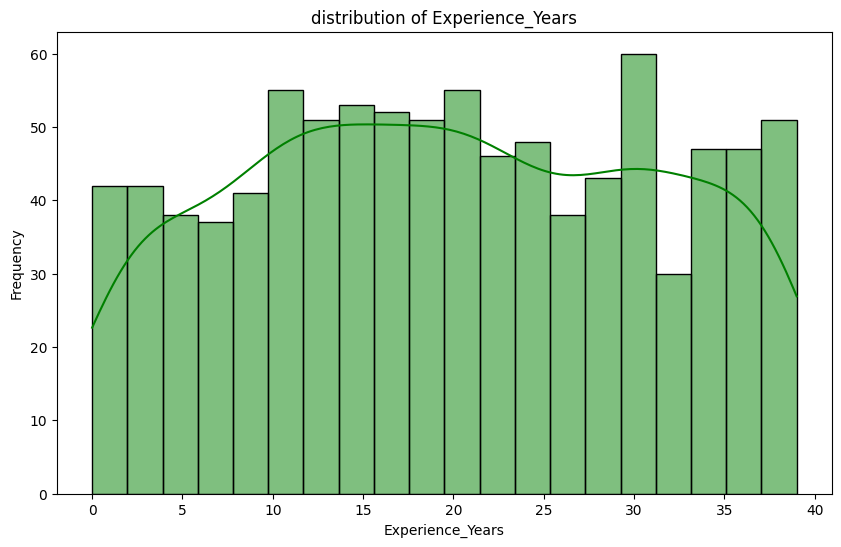

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['Experience_Years'].dropna(), kde=True, bins=20, color='green')
plt.title('distribution of Experience_Years')
plt.xlabel('Experience_Years')
plt.ylabel('Frequency')
plt.show()

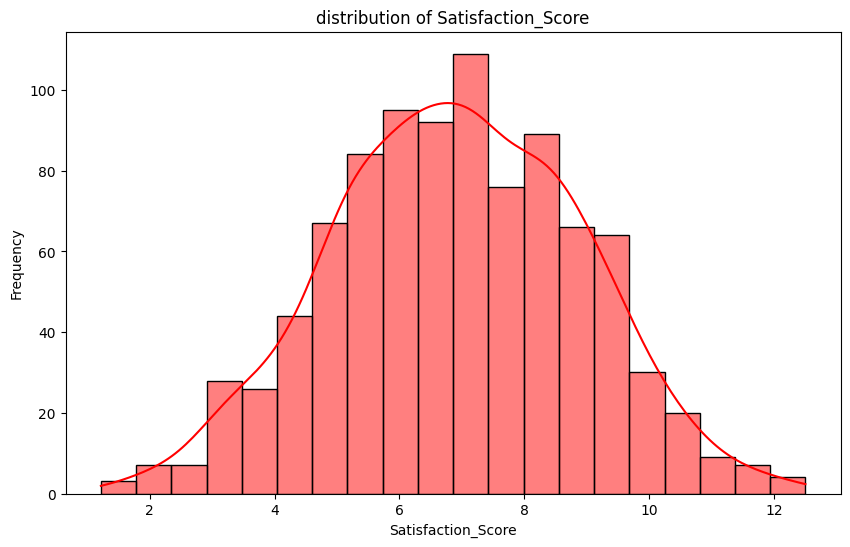

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(df['Satisfaction_Score'].dropna(), kde=True, bins=20, color='red')
plt.title('distribution of Satisfaction_Score')
plt.xlabel('Satisfaction_Score')
plt.ylabel('Frequency')
plt.show()

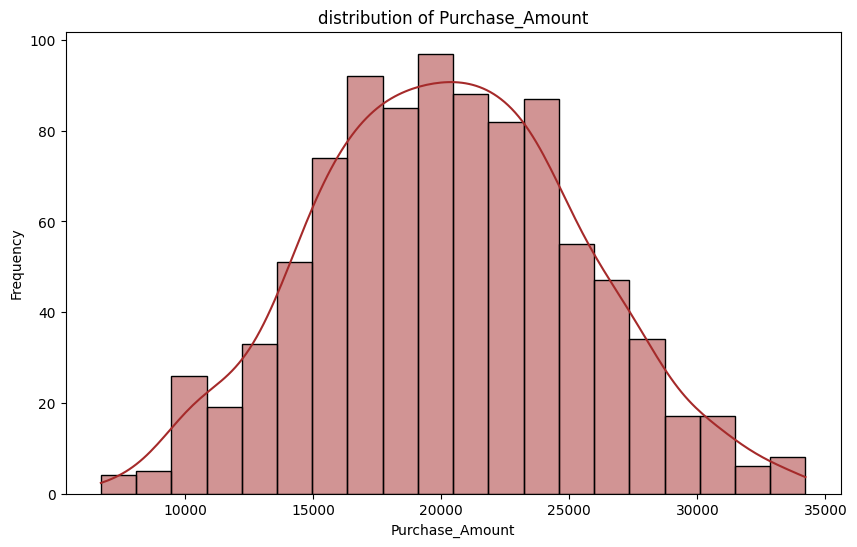

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df['Purchase_Amount'].dropna(), kde=True, bins=20, color='brown')
plt.title('distribution of Purchase_Amount')
plt.xlabel('Purchase_Amount')
plt.ylabel('Frequency')
plt.show()

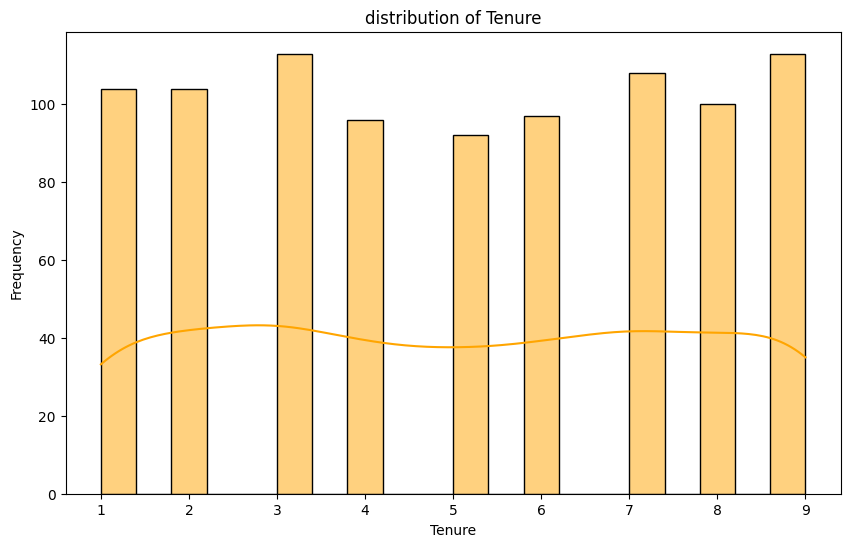

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(df['Tenure'].dropna(), kde=True, bins=20, color='orange')
plt.title('distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

## 5. BOXPLOT Visualization

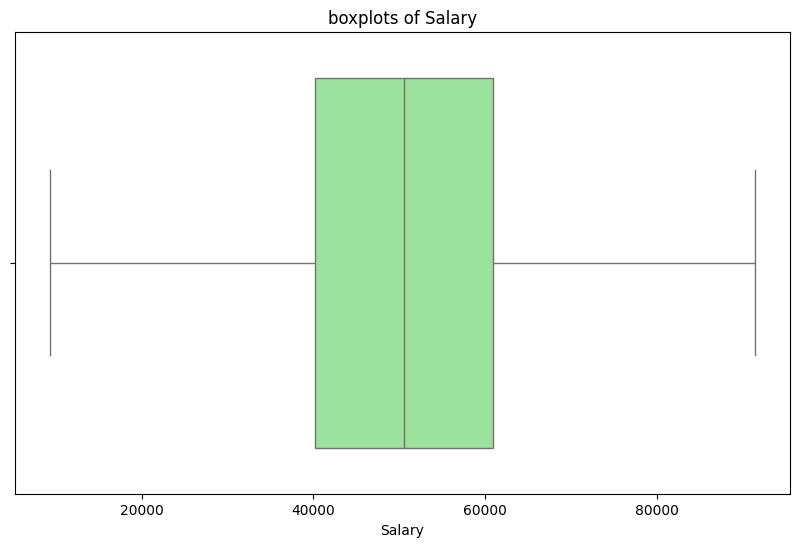

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Salary',data=df, color='lightgreen')
plt.title('boxplots of Salary')
plt.xlabel('Salary')
plt.show()

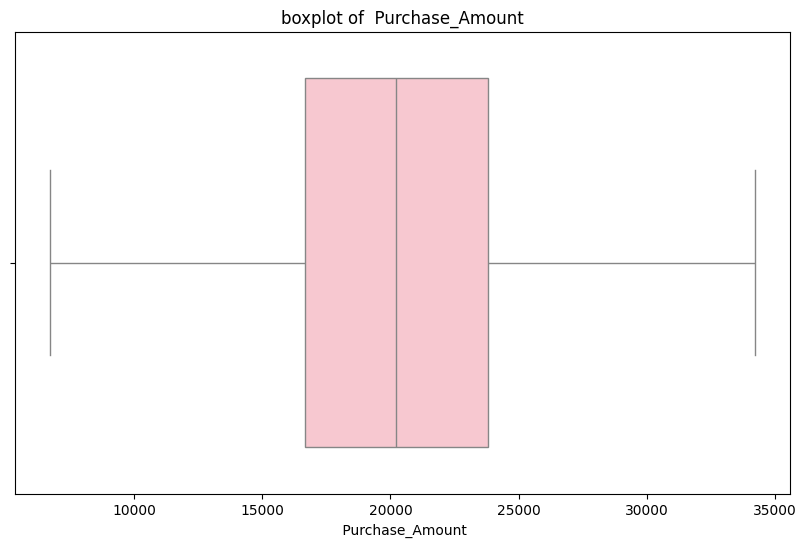

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Purchase_Amount',data=df, color='pink')
plt.title('boxplot of  Purchase_Amount')
plt.xlabel(' Purchase_Amount')
plt.show()

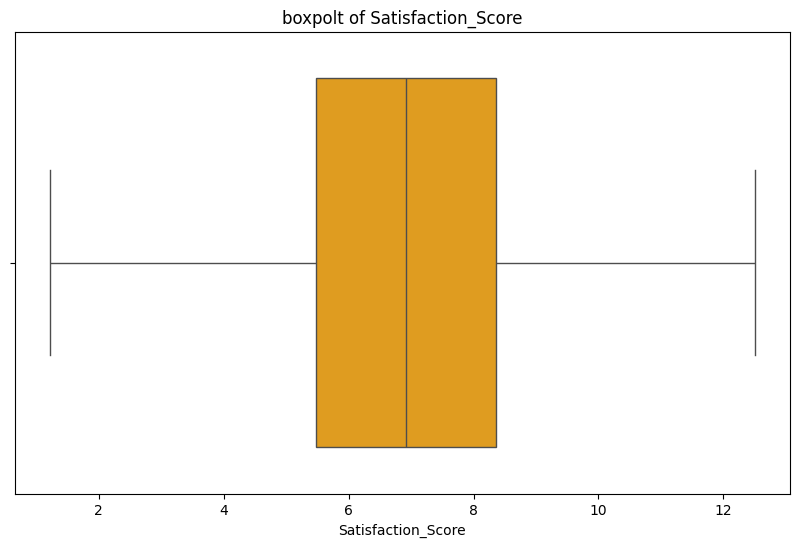

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Satisfaction_Score',data=df, color='orange')
plt.title('boxpolt of Satisfaction_Score')
plt.xlabel('Satisfaction_Score')
plt.show()

4.COUNTPOLT

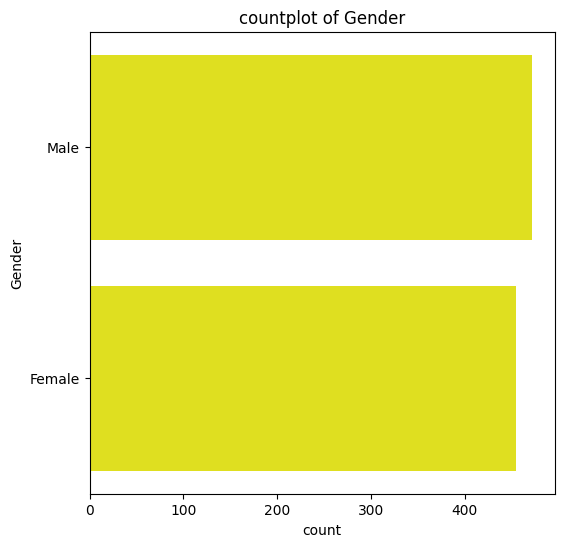

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index, color='yellow')
plt.title('countplot of Gender')
plt.xlabel('count')
plt.ylabel('Gender')
plt.show()

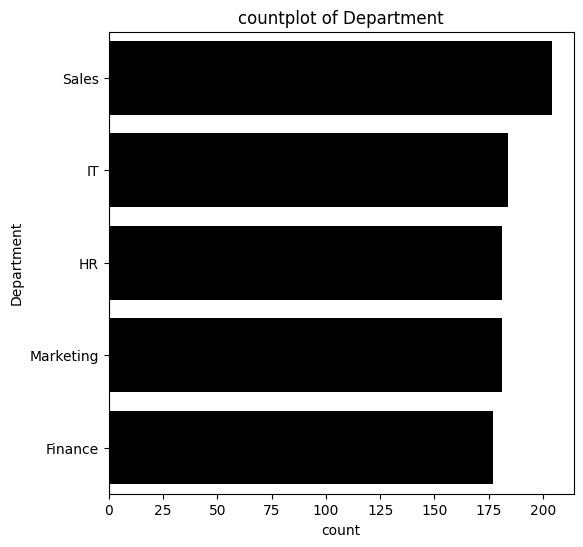

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(y='Department', data=df, order=df['Department'].value_counts().index, color='black')
plt.title('countplot of Department')
plt.xlabel('count')
plt.ylabel('Department')
plt.show()

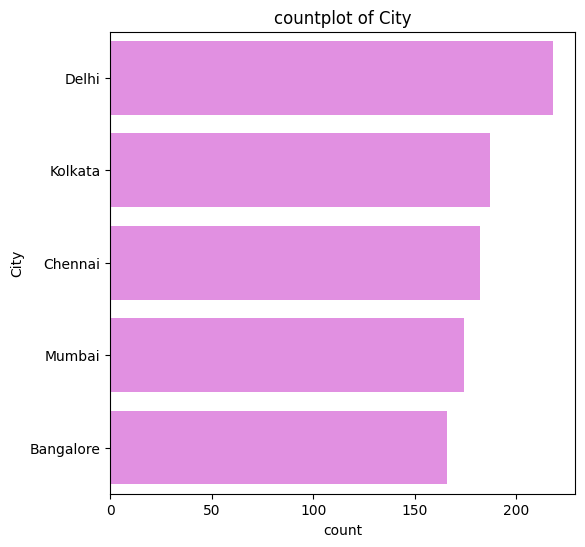

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(y='City', data=df, order=df['City'].value_counts().index, color='violet')
plt.title('countplot of City')
plt.xlabel('count')
plt.ylabel('City')
plt.show()

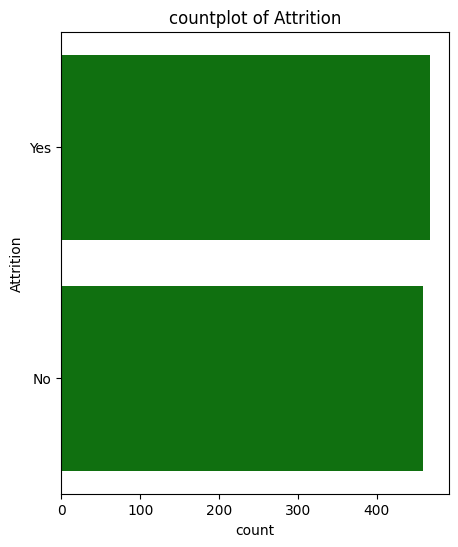

In [45]:
plt.figure(figsize=(5,6))
sns.countplot(y='Attrition', data=df, order=df['Attrition'].value_counts().index, color='green')
plt.title('countplot of Attrition')
plt.xlabel('count')
plt.ylabel('Attrition')
plt.show()